In [53]:
import numpy as np
import pandas as pd
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# base de datos extraida de kaggle.com sobre lesiones en la NBA entre los años 2010 y 2020
injuries_df = pd.read_csv('injuries_2010-2020.csv')
injuries_df

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


In [4]:
injuries_df.describe()

,Date,Team,Acquired,Relinquished,Notes
count,27105,27103,9542,17560,27105
unique,2103,32,1111,1156,3114
top,2014-04-16,Spurs,Dwyane Wade,Kevin Love,activated from IL
freq,76,1163,54,101,7342


In [36]:
# trabajaremos sobre la cantidad de lesiones por año
# crearemos una columa 'Year'
injuries_df['Date'] = pd.to_datetime(injuries_df['Date'], errors='coerce')
injuries_df['Year'] = injuries_df['Date'].dt.year 
injuries_df

,Date,Team,Acquired,Relinquished,Notes,Year
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020


In [59]:
# muestra aleatoria simple
simple_df = injuries_df.sample(100)
simple_df

,Date,Team,Acquired,Relinquished,Notes,Year
7382,2013-04-21,Warriors,NaN,David Lee,torn right hip flexor (out for season),2013
21431,2018-03-10,Heat,Jordan Mickey,NaN,activated from IL,2018
24867,2019-10-23,Wizards,NaN,Isaiah Thomas,left thumb injury (DTD),2019
13505,2015-11-22,Mavericks,JaVale McGee,NaN,activated from IL,2015
18896,2017-05-03,Lakers,NaN,Luol Deng,surgery on right pectoral muscle (out indefini...,2017
...,...,...,...,...,...,...
24785,2019-06-05,Warriors,NaN,Klay Thompson,strained left hamstring (DTD),2019
11382,2015-01-02,Knicks,NaN,Tim Hardaway Jr.,placed on IL with concussion,2015
26816,2020-07-31,Suns,Deandre Ayton,NaN,returned to lineup,2020
21641,2018-03-21,Knicks,NaN,Luke Kornet,placed on IL,2018


In [60]:
simple_df.describe()

,Year
count,100.000
mean,2015.790
std,2.872
min,2010.000
25%,2013.000
50%,2016.000
75%,2018.000
max,2020.000


In [61]:
simple_df['Year'].value_counts().sort_index(ascending=True)

2010     3
2011     8
2012     6
2013     9
2014     7
2015     7
2016    13
2017    12
2018    15
2019    13
2020     7
Name: Year, dtype: int64

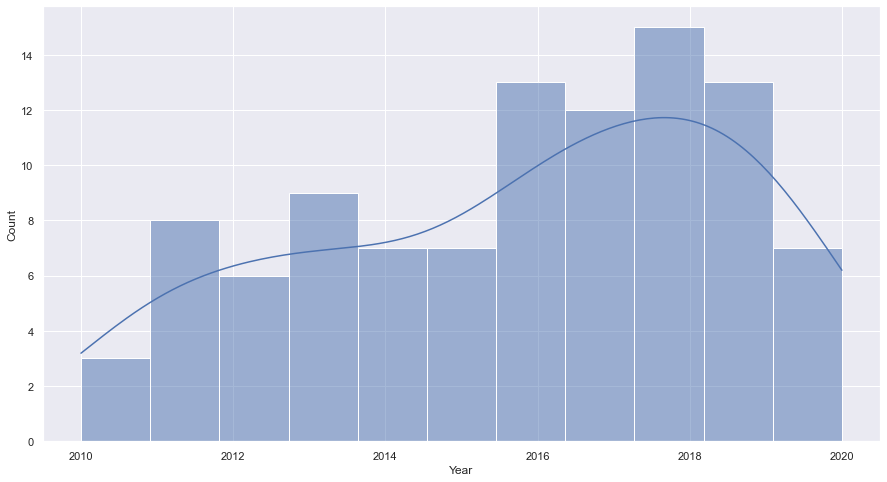

In [76]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=simple_df, x='Year', kde=True, bins=11)
plt.show()

In [77]:
# muestra sistematica
ini = 1537
step = 84
sistem_df = injuries_df[ini:len(injuries_df):step]
sistem_df

,Date,Team,Acquired,Relinquished,Notes,Year
1537,2011-02-10,Nuggets,NaN,Melvin Ely,placed on IL,2011
1621,2011-02-16,Cavaliers,Alonzo Gee,NaN,activated from IL,2011
1705,2011-02-25,Cavaliers,NaN,Semih Erden,placed on IL,2011
1789,2011-02-28,Nuggets,Kenyon Martin,NaN,activated from IL,2011
1873,2011-03-06,Knicks,NaN,Bill Walker,placed on IL with sore left knee,2011
...,...,...,...,...,...,...
26737,2020-03-11,Pistons,NaN,Bruce Brown,sprained right ankle (out for season),2020
26821,2020-07-31,Wizards,Isaac Bonga,NaN,activated from IL,2020
26905,2020-08-08,Thunder,Mike Muscala,NaN,activated from IL,2020
26989,2020-08-12,Thunder,Nerlens Noel,NaN,activated from IL,2020


In [78]:
sistem_df.describe()

,Year
count,305.000000
mean,2015.481967
std,2.589294
min,2011.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2020.000000


In [79]:
sistem_df['Year'].value_counts().sort_index(ascending=True)

2011    15
2012    37
2013    32
2014    34
2015    32
2016    35
2017    40
2018    35
2019    29
2020    16
Name: Year, dtype: int64

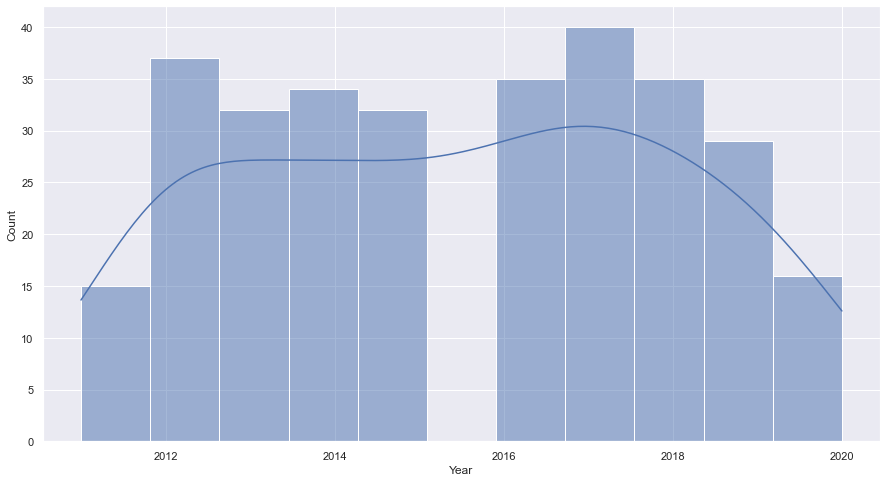

In [80]:
sns.set(style="darkgrid")
sns.set(rc= {'figure.figsize':(15,8)})
sns.histplot(data=sistem_df, x='Year', kde=True, bins=11)
plt.show()

In [82]:
# muestra estratificada 
injuries_df.isna().sum()

Date                0
Team                2
Acquired        17563
Relinquished     9545
Notes               0
Year                0
dtype: int64

In [83]:
team_df.isna().sum()

2

In [84]:
injuries_df2 = injuries_df.copy()
injuries_df2

,Date,Team,Acquired,Relinquished,Notes,Year
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2020
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020


In [85]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(injuries_df2, test_size=0.20, stratify=injuries_df2[['Year']])
Xtrain

,Date,Team,Acquired,Relinquished,Notes,Year
16021,2016-10-31,Timberwolves,NaN,Ricky Rubio,sprained right elbow (DTD),2016
5079,2012-10-31,Pistons,NaN,Viacheslav Kravstov,placed on IL,2012
24790,2019-06-13,Warriors,NaN,Kevin Durant,placed on IL with torn right Achilles tendon (...,2019
5587,2012-12-13,Blazers,Nicolas Batum,NaN,activated from IL,2012
2168,2011-03-28,Bucks,Michael Redd,NaN,activated from IL,2011
...,...,...,...,...,...,...
15134,2016-03-17,Pacers,NaN,Ian Mahinmi,placed on IL with sore lower back,2016
15885,2016-10-24,Hornets,NaN,Frank Kaminsky,strained right foot (DTD),2016
6741,2013-03-13,Timberwolves,NaN,Andrei Kirilenko,strained right quadricep (DNP),2013
21053,2018-02-08,Thunder,P.J. Dozier,NaN,activated from IL,2018


In [86]:
Xtrain.describe()

,Year
count,21684.000000
mean,2015.198995
std,2.769924
min,2010.000000
25%,2013.000000
50%,2015.000000
75%,2017.000000
max,2020.000000
